CNN model for MNIST Dataset



In [ ]:
from keras import layers
from keras import models

#### Instantiating a small convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 41s 53ms/step - loss: 0.4614 - accuracy: 0.8531 - val_loss: 0.0723 - val_accuracy: 0.9806
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0489 - val_accuracy: 0.9847
Epoch 3/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0677 - val_accuracy: 0.9819
Epoch 4/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0485 - val_accuracy: 0.9866
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0459 - val_accuracy: 0.9896


#### evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.0345 - accuracy: 0.9910


0.9909999966621399

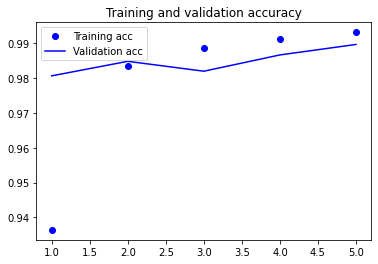

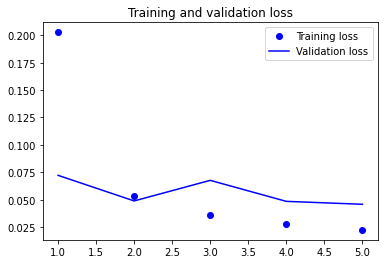

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 38s 50ms/step - loss: 1.6793 - accuracy: 0.4795 - val_loss: 0.3055 - val_accuracy: 0.9090
Epoch 2/5
750/750 [==============================] - 37s 50ms/step - loss: 0.3027 - accuracy: 0.9076 - val_loss: 0.1839 - val_accuracy: 0.9449
Epoch 3/5
750/750 [==============================] - 37s 49ms/step - loss: 0.1881 - accuracy: 0.9427 - val_loss: 0.1301 - val_accuracy: 0.9620
Epoch 4/5
750/750 [==============================] - 37s 50ms/step - loss: 0.1400 - accuracy: 0.9575 - val_loss: 0.1074 - val_accuracy: 0.9682
Epoch 5/5
750/750 [==============================] - 38s 50ms/step - loss: 0.1071 - accuracy: 0.9663 - val_loss: 0.0932 - val_accuracy: 0.9717


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 8ms/step - loss: 0.0824 - accuracy: 0.9745


0.9745000004768372

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 38s 50ms/step - loss: 0.1442 - accuracy: 0.9562 - val_loss: 0.0608 - val_accuracy: 0.9811
Epoch 2/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 3/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0512 - val_accuracy: 0.9835
Epoch 4/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0264 - accuracy: 0.9909 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0449 - val_accuracy: 0.9888


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.0362 - accuracy: 0.9891


0.9890999794006348